# Example 1
Loading an orthophoto (TIF) from an ASDC WebODM project/task
- List all projects and their associated tasks
- Select project and task
- read the files.json and select a file containing the text orthophoto
- create a folder named taskname and download the orthophoto to it
- display a thumbnai image of the orthophoto

Create a new task and save a geojson object of the spatial bounds
- Get the spatial bounds
- Create geojon object
- Create a new task
- create a geojson file
- save file to task


### List all the projects and tasks

In [2]:
import asdc
import pathlib
import os

asdc.task_select()

interactive(children=(Dropdown(description='project', index=8, options=(('478: ASDC Shared Test Project', 478)…

interactive(children=(Dropdown(description='task', index=3, options=(('GeoJson spatial bounds', 'c2dfb0db-a2ff…

Button(description='Run all below', icon='play', style=ButtonStyle())

### Select the project and task

In [3]:
print(asdc.selected)
project_id = asdc.selected['project']
task_id = asdc.selected['task']
task_name = asdc.task_dict[task_id]['name']

{'project': 700, 'task': '91e67750-622e-4b91-91e9-53a1b8ea5017'}


In [4]:
import asdc
await asdc.auth.connect()

'await asdc.connect()' is deprecated, you can remove this line from your code
Already have a valid token


### Iterate through the assets looking for an orthophoto

In [5]:
u = asdc.call_api(f"https://asdc.cloud.edu.au/api/projects/{project_id}/tasks/{task_id}/assets/files.json").json()
filename = ""
print(u)     

{'custom_assets': {'files.json': {'modified': '2023-03-20T02:54:57.679091'}}, 'files': ['assets/Chain-Of-Lagoons-30-03-2018_crop-orthophoto.tif', 'assets/files.json']}


In [6]:
files = u["files"]

if files:
    print("Files:")
    for f in files:
        prefix=""
        destpath, destfile = os.path.split(f)
        if ("orthophoto" in f):
            prefix="*** "
            filename=destfile
        print(prefix+destfile)   

Files:
*** Chain-Of-Lagoons-30-03-2018_crop-orthophoto.tif
files.json


### Download the selected asset (orthophoto)

In [7]:
#Create a working dir for the task
if "orthophoto" in filename:
    pathlib.Path("working").mkdir(parents=True, exist_ok=True)
    os.chdir("working")
    asdc.download_asset(filename)

### Display the image

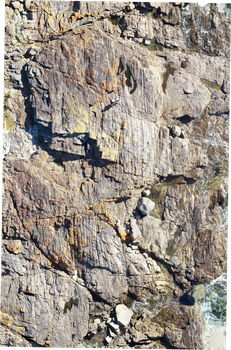

In [8]:
if "orthophoto" in filename:
    from IPython.display import display
    from PIL import Image

    im = Image.open(filename)
    im.thumbnail((350,350),Image.LANCZOS)
    display(im)

### Get the spatial bounds

In [9]:
import rasterio

dataset = rasterio.open(filename)
bb=dataset.bounds
bb

BoundingBox(left=607606.7979805912, bottom=5383151.309873291, right=607635.3196831899, top=5383194.61071973)

In [11]:
#!pip install geojson 

from geojson import Polygon

gj=Polygon([[(float(bb.left), float(bb.bottom)),(float(bb.right), float(bb.bottom)),(float(bb.right), float(bb.top)),(float(bb.left), float(bb.top))]])

### Create a geojson bounding box file

In [12]:
import json
with open('bbox.json', 'w') as f:
    json.dump(gj, f)

### Create a new task
assets/geojson/bbox.json

In [13]:
#Upload assests to new task
#New placeholder imported task, then add orthophoto afterwards
new_task_id = asdc.import_task(f"GeoJson spatial bounds")

r = asdc.upload_asset('bbox.json', dest="geojson/bbox.json", task=new_task_id)
if not r.ok: print(r)

task.zip:   0%|          | 0.00/142 [00:00<?, ?B/s]

bbox.json:   0%|          | 0.00/168 [00:00<?, ?B/s]